In [1]:
!pip3 install -q opencv-python

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!pip3 install pandas

     |████████████████████████████████| 11.0 MB 1.9 MB/s eta 0:00:01    |███████████████████████▉        | 8.2 MB 6.1 MB/s eta 0:00:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
!pip3 install --upgrade pip
!pip3 install tqdm
!pip3 install matplotlib

     |████████████████████████████████| 2.1 MB 2.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 4.7 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 5.3 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.0 MB/s eta 0:00:0000:0100:01
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)


In [8]:
!pip3 install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 MB 1.9 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.1 MB/s eta 0:00:0000:0100:01
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 5.8 MB/s eta 0:00:0000:0100:01
  Using cached libclang-16.0.0-py2.py3-none-macosx_10_9_x86_64.whl (26.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [1]:
import csv
import cv2
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection 

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2023-04-09 12:44:49.294848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
!pip3 install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.1 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 4.7 MB/s eta 0:00:0000:0100:01


### Code to run pose estimation using MoveNet

In [7]:
#@title Functions to run pose estimation with MoveNet

#@markdown You'll download the MoveNet Thunder model from [TensorFlow Hub](https://www.google.com/url?sa=D&q=https%3A%2F%2Ftfhub.dev%2Fs%3Fq%3Dmovenet), and reuse some inference and visualization logic from the [MoveNet Raspberry Pi (Python)](https://github.com/tensorflow/examples/tree/master/lite/examples/pose_estimation/raspberry_pi) sample app to detect landmarks (ear, nose, wrist etc.) from the input images.

#@markdown *Note: You should use the most accurate pose estimation model (i.e. MoveNet Thunder) to detect the keypoints and use them to train the pose classification model to achieve the best accuracy. When running inference, you can use a pose estimation model of your choice (e.g. either MoveNet Lightning or Thunder).*

# Download model from TF Hub and check out inference code from GitHub
# !git clone https://github.com/tensorflow/examples.git
# pose_sample_rpi_path = os.path.join(os.getcwd(), 'examples/lite/examples/pose_estimation/raspberry_pi')
# sys.path.append(pose_sample_rpi_path)

# Load MoveNet Thunder model
import utils
from data import BodyPart
from ml import Movenet
movenet = Movenet('movenet_thunder')

# Define function to run pose estimation using MoveNet Thunder.
# You'll apply MoveNet's cropping algorithm and run inference multiple times on
# the input image to improve pose estimation accuracy.
def detect(input_tensor, inference_count=3):
  
  image_height, image_width, channel = input_tensor.shape
 
  # Detect pose using the full input image
  movenet.detect(input_tensor.numpy(), reset_crop_region=True)
 
  # Repeatedly using previous detection result to identify the region of
  # interest and only croping that region to improve detection accuracy
  for _ in range(inference_count - 1):
    person = movenet.detect(input_tensor.numpy(), 
                            reset_crop_region=False)

  return person

ImportError: cannot import name 'BodyPart' from 'data' (/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/data/__init__.py)

In [5]:
pip install data

  Using cached data-0.4-py3-none-any.whl
  Using cached funcsigs-1.0.2-py2.py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
# !pip3 install ml
!pip3 install --upgrade pip

In [46]:
!pip3 list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
appnope                      0.1.3
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
data                         0.4
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
fonttools                    4.39.3
funcsigs                     1.0.2
gast                         0.4.0
google-auth                  2.17.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
ipykernel                    6.22.0
ipython 

In [27]:
#@title Functions to visualize the pose estimation results.

def draw_prediction_on_image(
    image, person, crop_region=None, close_figure=True,
    keep_input_size=False):
  """Draws the keypoint predictions on image.
 
  Args:
    image: An numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    person: A person entity returned from the MoveNet.SinglePose model.
    close_figure: Whether to close the plt figure after the function returns.
    keep_input_size: Whether to keep the size of the input image.
 
  Returns:
    An numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  # Draw the detection result on top of the image.
  image_np = utils.visualize(image, [person])
  
  # Plot the image with detection results.
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  im = ax.imshow(image_np)
 
  if close_figure:
    plt.close(fig)
 
  if not keep_input_size:
    image_np = utils.keep_aspect_ratio_resizer(image_np, (512, 512))

  return image_np

In [35]:
#@title Code to load the images, detect pose landmarks and save them into a CSV file

class MoveNetPreprocessor(object):
 
 
  def __init__(self,
               images_in_folder,
               images_out_folder,
               csvs_out_path):
    "
    self._images_in_folder = images_in_folder
    self._images_out_folder = images_out_folder
    self._csvs_out_path = csvs_out_path
    self._messages = []

    # Create a temp dir to store the pose CSVs per class
    self._csvs_out_folder_per_class = tempfile.mkdtemp()
 
    # Get list of pose classes and print image statistics
    self._pose_class_names = sorted(
        [n for n in os.listdir(self._images_in_folder) if not n.startswith('.')]
        )
    
  def process(self, per_pose_class_limit=None, detection_threshold=0.1):
    
    # Loop through the classes and preprocess its images
    for pose_class_name in self._pose_class_names:
      print('Preprocessing', pose_class_name, file=sys.stderr)

      # Paths for the pose class.
      images_in_folder = os.path.join(self._images_in_folder, pose_class_name)
      images_out_folder = os.path.join(self._images_out_folder, pose_class_name)
      csv_out_path = os.path.join(self._csvs_out_folder_per_class,
                                  pose_class_name + '.csv')
      if not os.path.exists(images_out_folder):
        os.makedirs(images_out_folder)
 
      # Detect landmarks in each image and write it to a CSV file
      with open(csv_out_path, 'w') as csv_out_file:
        csv_out_writer = csv.writer(csv_out_file, 
                                    delimiter=',', 
                                    quoting=csv.QUOTE_MINIMAL)
        # Get list of images
        image_names = sorted(
            [n for n in os.listdir(images_in_folder) if not n.startswith('.')])
        if per_pose_class_limit is not None:
          image_names = image_names[:per_pose_class_limit]

        valid_image_count = 0
 
        # Detect pose landmarks from each image
        for image_name in tqdm.tqdm(image_names):
          image_path = os.path.join(images_in_folder, image_name)

          try:
            image = tf.io.read_file(image_path)
            image = tf.io.decode_jpeg(image)
          except:
            self._messages.append('Skipped ' + image_path + '. Invalid image.')
            continue
          else:
            image = tf.io.read_file(image_path)
            image = tf.io.decode_jpeg(image)
            image_height, image_width, channel = image.shape
          
          # Skip images that isn't RGB because Movenet requires RGB images
          if channel != 3:
            self._messages.append('Skipped ' + image_path +
                                  '. Image isn\'t in RGB format.')
            continue
          person = detect(image)
          
          # Save landmarks if all landmarks were detected
          min_landmark_score = min(
              [keypoint.score for keypoint in person.keypoints])
          should_keep_image = min_landmark_score >= detection_threshold
          if not should_keep_image:
            self._messages.append('Skipped ' + image_path +
                                  '. No pose was confidentlly detected.')
            continue

          valid_image_count += 1

          # Draw the prediction result on top of the image for debugging later
          output_overlay = draw_prediction_on_image(
              image.numpy().astype(np.uint8), person, 
              close_figure=True, keep_input_size=True)
        
          # Write detection result into an image file
          output_frame = cv2.cvtColor(output_overlay, cv2.COLOR_RGB2BGR)
          cv2.imwrite(os.path.join(images_out_folder, image_name), output_frame)
        
          # Get landmarks and scale it to the same size as the input image
          pose_landmarks = np.array(
              [[keypoint.coordinate.x, keypoint.coordinate.y, keypoint.score]
                for keypoint in person.keypoints],
              dtype=np.float32)

          # Write the landmark coordinates to its per-class CSV file
          coordinates = pose_landmarks.flatten().astype(str).tolist()
          csv_out_writer.writerow([image_name] + coordinates)

        if not valid_image_count:
          raise RuntimeError(
              'No valid images found for the "{}" class.'
              .format(pose_class_name))
      
    # Print the error message collected during preprocessing.
    print('\n'.join(self._messages))

    # Combine all per-class CSVs into a single output file
    all_landmarks_df = self._all_landmarks_as_dataframe()
    all_landmarks_df.to_csv(self._csvs_out_path, index=False)

  def class_names(self):
   
    return self._pose_class_names
  
  def _all_landmarks_as_dataframe(self):
   
    total_df = None
    for class_index, class_name in enumerate(self._pose_class_names):
      csv_out_path = os.path.join(self._csvs_out_folder_per_class,
                                  class_name + '.csv')
      per_class_df = pd.read_csv(csv_out_path, header=None)
      
      # Add the labels
      per_class_df['class_no'] = [class_index]*len(per_class_df)
      per_class_df['class_name'] = [class_name]*len(per_class_df)

      # Append the folder name to the filename column (first column)
      per_class_df[per_class_df.columns[0]] = (os.path.join(class_name, '') 
        + per_class_df[per_class_df.columns[0]].astype(str))

      if total_df is None:
        # For the first class, assign its data to the total dataframe
        total_df = per_class_df
      else:
        # Concatenate each class's data into the total dataframe
        total_df = pd.concat([total_df, per_class_df], axis=0)
 
    list_name = [[bodypart.name + '_x', bodypart.name + '_y', 
                  bodypart.name + '_score'] for bodypart in BodyPart] 
    header_name = []
    for columns_name in list_name:
      header_name += columns_name
    header_name = ['file_name'] + header_name
    header_map = {total_df.columns[i]: header_name[i] 
                  for i in range(len(header_name))}
 
    total_df.rename(header_map, axis=1, inplace=True)

    return total_df

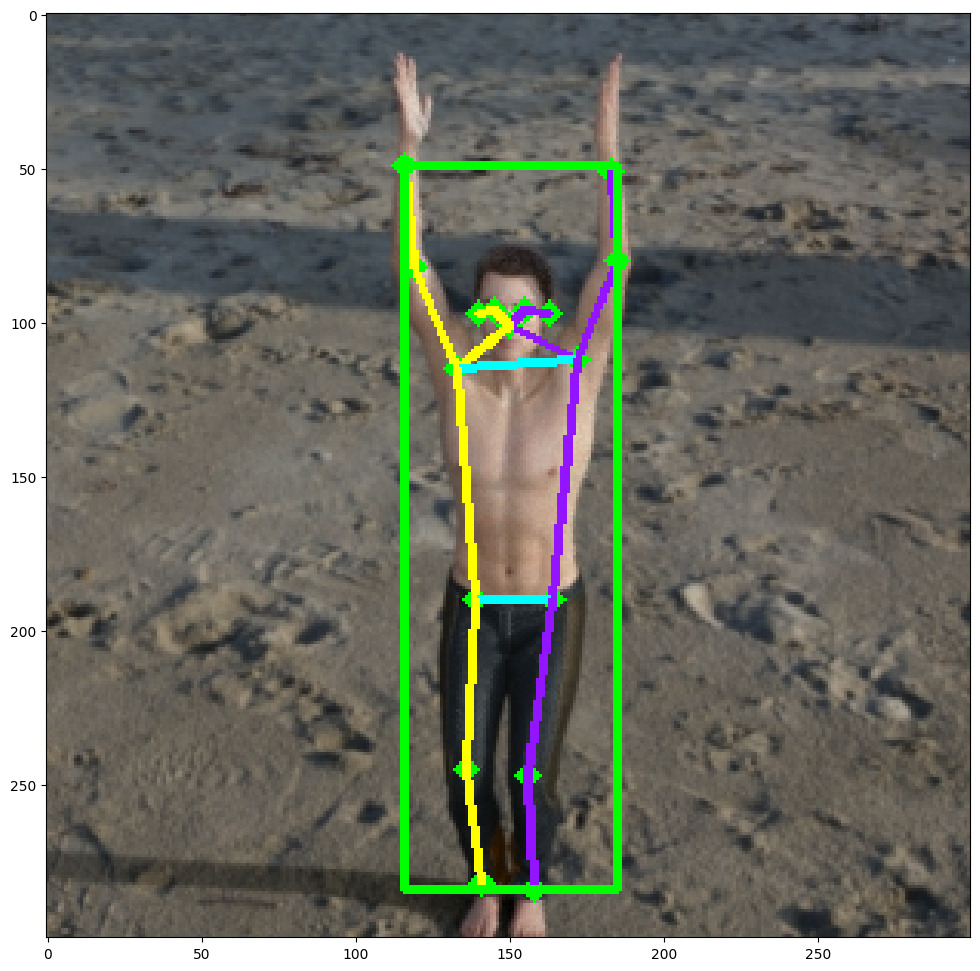

In [31]:


test_image_url = "https://cdn.pixabay.com/photo/2017/03/03/17/30/yoga-2114512_960_720.jpg" #@param {type:"string"}

if len(test_image_url):
  image = tf.io.read_file('yoga_poses/test/chair/guy3_chair070.jpg')
  image = tf.io.decode_jpeg(image)
  person = detect(image)
  _ = draw_prediction_on_image(image.numpy(), person, crop_region=None, 
                               close_figure=False, keep_input_size=True)

In [32]:
is_skip_step_1 = False #@param ["False", "True"] {type:"raw"}

In [9]:
use_custom_dataset = False #@param ["False", "True"] {type:"raw"}

dataset_is_split = False #@param ["False", "True"] {type:"raw"}

In [10]:
#@markdown Be sure you run this cell. It's hiding the `split_into_train_test()` function that's called in the next code block.

import os
import random
import shutil

def split_into_train_test(images_origin, images_dest, test_split):
 
  _, dirs, _ = next(os.walk(images_origin))

  TRAIN_DIR = os.path.join(images_dest, 'train')
  TEST_DIR = os.path.join(images_dest, 'test')
  os.makedirs(TRAIN_DIR, exist_ok=True)
  os.makedirs(TEST_DIR, exist_ok=True)

  for dir in dirs:
    # Get all filenames for this dir, filtered by filetype
    filenames = os.listdir(os.path.join(images_origin, dir))
    filenames = [os.path.join(images_origin, dir, f) for f in filenames if (
        f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.bmp'))]
    # Shuffle the files, deterministically
    filenames.sort()
    random.seed(42)
    random.shuffle(filenames)
    # Divide them into train/test dirs
    os.makedirs(os.path.join(TEST_DIR, dir), exist_ok=True)
    os.makedirs(os.path.join(TRAIN_DIR, dir), exist_ok=True)
    test_count = int(len(filenames) * test_split)
    for i, file in enumerate(filenames):
      if i < test_count:
        destination = os.path.join(TEST_DIR, dir, os.path.split(file)[1])
      else:
        destination = os.path.join(TRAIN_DIR, dir, os.path.split(file)[1])
      shutil.copyfile(file, destination)
    print(f'Moved {test_count} of {len(filenames)} from class "{dir}" into test.')
  print(f'Your split dataset is in "{images_dest}"')

**Note:** If you're using `split_into_train_test()` to split the dataset, it expects all images to be PNG, JPEG, or BMP—it ignores other file types.

In [12]:
if not is_skip_step_1 and not use_custom_dataset:
  !wget -O yoga_poses.zip http://download.tensorflow.org/data/pose_classification/yoga_poses.zip
  !unzip -q yoga_poses.zip -d yoga_cg
  IMAGES_ROOT = "yoga_cg"

--2022-10-20 11:12:03--  http://download.tensorflow.org/data/pose_classification/yoga_poses.zip
Resolving download.tensorflow.org (download.tensorflow.org)... 

74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 102517581 (98M) [application/zip]
Saving to: ‘yoga_poses.zip’


yoga_poses.zip        0%[                    ]       0  --.-KB/s               


yoga_poses.zip        4%[                    ]   4.01M  8.56MB/s               


yoga_poses.zip       51%[=========>          ]  49.96M  74.8MB/s               


yoga_poses.zip       90%[=================>  ]  88.01M  87.6MB/s               
yoga_poses.zip      100%[===================>]  97.77M  95.0MB/s    in 1.0s    

2022-10-20 11:12:04 (95.0 MB/s) - ‘yoga_poses.zip’ saved [102517581/102517581]



### Preprocess the `TRAIN` dataset

In [36]:
IMAGES_ROOT = "yoga_poses"
if not is_skip_step_1:
  images_in_train_folder = os.path.join(IMAGES_ROOT, 'train')
  images_out_train_folder = 'poses_images_out_train'
  csvs_out_train_path = 'train_data.csv'

  preprocessor = MoveNetPreprocessor(
      images_in_folder=images_in_train_folder,
      images_out_folder=images_out_train_folder,
      csvs_out_path=csvs_out_train_path,
  )

  preprocessor.process(per_pose_class_limit=None)

Preprocessing chair
100%|██████████| 200/200 [00:38<00:00,  5.26it/s]
Preprocessing cobra
100%|██████████| 200/200 [00:38<00:00,  5.23it/s]
Preprocessing dog
100%|██████████| 200/200 [00:41<00:00,  4.78it/s]
Preprocessing tree
100%|██████████| 200/200 [00:39<00:00,  5.04it/s]
Preprocessing warrior
100%|██████████| 200/200 [00:36<00:00,  5.44it/s]


Skipped yoga_poses/train/chair/girl3_chair091.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair092.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair093.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair094.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair096.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair097.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair099.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair100.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair104.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair106.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair110.jpg. No pose was confidentlly detected.
Skipped yoga_poses/train/chair/girl3_chair114.jpg. No 

### Preprocess the `TEST` dataset

In [37]:
if not is_skip_step_1:
  images_in_test_folder = os.path.join(IMAGES_ROOT, 'test')
  images_out_test_folder = 'poses_images_out_test'
  csvs_out_test_path = 'test_data.csv'

  preprocessor = MoveNetPreprocessor(
      images_in_folder=images_in_test_folder,
      images_out_folder=images_out_test_folder,
      csvs_out_path=csvs_out_test_path,
  )

  preprocessor.process(per_pose_class_limit=None)

Preprocessing chair
100%|██████████| 84/84 [00:18<00:00,  4.61it/s]
Preprocessing cobra
100%|██████████| 116/116 [00:17<00:00,  6.78it/s]
Preprocessing dog
100%|██████████| 90/90 [00:13<00:00,  6.73it/s]
Preprocessing tree
100%|██████████| 96/96 [00:14<00:00,  6.41it/s]
Preprocessing warrior
100%|██████████| 109/109 [00:16<00:00,  6.46it/s]


Skipped yoga_poses/test/cobra/guy3_cobra048.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra050.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra051.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra052.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra053.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra054.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra055.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra056.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra057.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra058.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra059.jpg. No pose was confidentlly detected.
Skipped yoga_poses/test/cobra/guy3_cobra060.jpg. No pose was confidentlly de

In [38]:
def load_pose_landmarks(csv_path):


  # Load the CSV file
  dataframe = pd.read_csv(csv_path)
  df_to_process = dataframe.copy()

  # Drop the file_name columns as you don't need it during training.
  df_to_process.drop(columns=['file_name'], inplace=True)

  # Extract the list of class names
  classes = df_to_process.pop('class_name').unique()

  # Extract the labels
  y = df_to_process.pop('class_no')

  # Convert the input features and labels into the correct format for training.
  X = df_to_process.astype('float64')
  y = keras.utils.to_categorical(y)

  return X, y, classes, dataframe

In [39]:
# Load the train data
X, y, class_names, _ = load_pose_landmarks(csvs_out_train_path)

# Split training data (X, y) into (X_train, y_train) and (X_val, y_val)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.15)

In [40]:
# Load the test data
X_test, y_test, _, df_test = load_pose_landmarks(csvs_out_test_path)

In [41]:
def get_center_point(landmarks, left_bodypart, right_bodypart):
  """Calculates the center point of the two given landmarks."""

  left = tf.gather(landmarks, left_bodypart.value, axis=1)
  right = tf.gather(landmarks, right_bodypart.value, axis=1)
  center = left * 0.5 + right * 0.5
  return center


def get_pose_size(landmarks, torso_size_multiplier=2.5):
  """Calculates pose size.

  It is the maximum of two values:
    * Torso size multiplied by `torso_size_multiplier`
    * Maximum distance from pose center to any pose landmark
  """
  # Hips center
  hips_center = get_center_point(landmarks, BodyPart.LEFT_HIP, 
                                 BodyPart.RIGHT_HIP)

  # Shoulders center
  shoulders_center = get_center_point(landmarks, BodyPart.LEFT_SHOULDER,
                                      BodyPart.RIGHT_SHOULDER)

  # Torso size as the minimum body size
  torso_size = tf.linalg.norm(shoulders_center - hips_center)

  # Pose center
  pose_center_new = get_center_point(landmarks, BodyPart.LEFT_HIP, 
                                     BodyPart.RIGHT_HIP)
  pose_center_new = tf.expand_dims(pose_center_new, axis=1)
  # Broadcast the pose center to the same size as the landmark vector to
  # perform substraction
  pose_center_new = tf.broadcast_to(pose_center_new,
                                    [tf.size(landmarks) // (17*2), 17, 2])

  # Dist to pose center
  d = tf.gather(landmarks - pose_center_new, 0, axis=0,
                name="dist_to_pose_center")
  # Max dist to pose center
  max_dist = tf.reduce_max(tf.linalg.norm(d, axis=0))

  # Normalize scale
  pose_size = tf.maximum(torso_size * torso_size_multiplier, max_dist)

  return pose_size


def normalize_pose_landmarks(landmarks):
  """Normalizes the landmarks translation by moving the pose center to (0,0) and
  scaling it to a constant pose size.
  """
  # Move landmarks so that the pose center becomes (0,0)
  pose_center = get_center_point(landmarks, BodyPart.LEFT_HIP, 
                                 BodyPart.RIGHT_HIP)
  pose_center = tf.expand_dims(pose_center, axis=1)
  # Broadcast the pose center to the same size as the landmark vector to perform
  # substraction
  pose_center = tf.broadcast_to(pose_center, 
                                [tf.size(landmarks) // (17*2), 17, 2])
  landmarks = landmarks - pose_center

  # Scale the landmarks to a constant pose size
  pose_size = get_pose_size(landmarks)
  landmarks /= pose_size

  return landmarks


def landmarks_to_embedding(landmarks_and_scores):
  """Converts the input landmarks into a pose embedding."""
  # Reshape the flat input into a matrix with shape=(17, 3)
  reshaped_inputs = keras.layers.Reshape((17, 3))(landmarks_and_scores)

  # Normalize landmarks 2D
  landmarks = normalize_pose_landmarks(reshaped_inputs[:, :, :2])

  # Flatten the normalized landmark coordinates into a vector
  embedding = keras.layers.Flatten()(landmarks)

  return embedding

In [42]:
# Define the model
inputs = tf.keras.Input(shape=(51))
embedding = landmarks_to_embedding(inputs)

layer = keras.layers.Dense(128, activation=tf.nn.relu6)(embedding)
layer = keras.layers.Dropout(0.5)(layer)
layer = keras.layers.Dense(64, activation=tf.nn.relu6)(layer)
layer = keras.layers.Dropout(0.5)(layer)
outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 reshape (Reshape)              (None, 17, 3)        0           ['input_1[0][0]']                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 17, 2)       0           ['reshape[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.compat.v1.gather (TFOpLambd  (None, 2)           0           ['tf.__operators__.getitem[0]

In [43]:
model.save('mymodel.h5')

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "weights.best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=20)

# Start training
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200



 1/37 [..............................] - ETA: 2:07 - loss: 1.6516 - accuracy: 0.0625


19/37 [==============>...............] - ETA: 0s - loss: 1.5809 - accuracy: 0.2697  


37/37 [==============================] - ETA: 0s - loss: 1.5338 - accuracy: 0.3702


Epoch 1: val_accuracy improved from -inf to 0.46078, saving model to weights.best.hdf5



37/37 [==============================] - 4s 12ms/step - loss: 1.5338 - accuracy: 0.3702 - val_loss: 1.3954 - val_accuracy: 0.4608


Epoch 2/200



 1/37 [..............................] - ETA: 0s - loss: 1.4273 - accuracy: 0.4375


20/37 [===============>..............] - ETA: 0s - loss: 1.3273 - accuracy: 0.5000


Epoch 2: val_accuracy improved from 0.46078 to 0.64706, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 1.2609 - accuracy: 0.4896 - val_loss: 1.0494 - val_accuracy: 0.6471


Epoch 3/200



 1/37 [..............................] - ETA: 0s - loss: 1.2627 - accuracy: 0.3750


20/37 [===============>..............] - ETA: 0s - loss: 1.0551 - accuracy: 0.5469


Epoch 3: val_accuracy improved from 0.64706 to 0.72549, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 1.0066 - accuracy: 0.5675 - val_loss: 0.8727 - val_accuracy: 0.7255


Epoch 4/200



 1/37 [..............................] - ETA: 0s - loss: 0.9028 - accuracy: 0.5625


20/37 [===============>..............] - ETA: 0s - loss: 0.8850 - accuracy: 0.5844


Epoch 4: val_accuracy improved from 0.72549 to 0.73529, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.8592 - accuracy: 0.6211 - val_loss: 0.7408 - val_accuracy: 0.7353


Epoch 5/200



 1/37 [..............................] - ETA: 0s - loss: 0.6837 - accuracy: 0.6875


19/37 [==============>...............] - ETA: 0s - loss: 0.7872 - accuracy: 0.6579


37/37 [==============================] - ETA: 0s - loss: 0.7872 - accuracy: 0.6730


Epoch 5: val_accuracy improved from 0.73529 to 0.75490, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.7872 - accuracy: 0.6730 - val_loss: 0.6484 - val_accuracy: 0.7549


Epoch 6/200



 1/37 [..............................] - ETA: 0s - loss: 0.7384 - accuracy: 0.7500


20/37 [===============>..............] - ETA: 0s - loss: 0.7569 - accuracy: 0.7125


Epoch 6: val_accuracy did not improve from 0.75490



37/37 [==============================] - 0s 4ms/step - loss: 0.7268 - accuracy: 0.7042 - val_loss: 0.5973 - val_accuracy: 0.7353


Epoch 7/200



 1/37 [..............................] - ETA: 0s - loss: 0.5694 - accuracy: 0.8750


20/37 [===============>..............] - ETA: 0s - loss: 0.6100 - accuracy: 0.7531


Epoch 7: val_accuracy improved from 0.75490 to 0.81373, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.7526 - val_loss: 0.5191 - val_accuracy: 0.8137


Epoch 8/200



 1/37 [..............................] - ETA: 0s - loss: 0.6373 - accuracy: 0.8125


21/37 [================>.............] - ETA: 0s - loss: 0.6065 - accuracy: 0.7798


Epoch 8: val_accuracy improved from 0.81373 to 0.83333, saving model to weights.best.hdf5



37/37 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7734 - val_loss: 0.4880 - val_accuracy: 0.8333


Epoch 9/200



 1/37 [..............................] - ETA: 0s - loss: 0.5748 - accuracy: 0.7500


20/37 [===============>..............] - ETA: 0s - loss: 0.5720 - accuracy: 0.8156


Epoch 9: val_accuracy improved from 0.83333 to 0.86275, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.5482 - accuracy: 0.8114 - val_loss: 0.4396 - val_accuracy: 0.8627


Epoch 10/200



 1/37 [..............................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8750


20/37 [===============>..............] - ETA: 0s - loss: 0.5046 - accuracy: 0.8000


Epoch 10: val_accuracy improved from 0.86275 to 0.89216, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.8062 - val_loss: 0.3829 - val_accuracy: 0.8922


Epoch 11/200



 1/37 [..............................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8125


19/37 [==============>...............] - ETA: 0s - loss: 0.5013 - accuracy: 0.7993


37/37 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.8253


Epoch 11: val_accuracy improved from 0.89216 to 0.90196, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.8253 - val_loss: 0.3636 - val_accuracy: 0.9020


Epoch 12/200



 1/37 [..............................] - ETA: 0s - loss: 0.4242 - accuracy: 0.8125


20/37 [===============>..............] - ETA: 0s - loss: 0.4332 - accuracy: 0.8406


Epoch 12: val_accuracy did not improve from 0.90196



37/37 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.8356 - val_loss: 0.3243 - val_accuracy: 0.9020


Epoch 13/200



 1/37 [..............................] - ETA: 0s - loss: 0.5416 - accuracy: 0.7500


19/37 [==============>...............] - ETA: 0s - loss: 0.4003 - accuracy: 0.8750


Epoch 13: val_accuracy improved from 0.90196 to 0.91176, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8668 - val_loss: 0.3064 - val_accuracy: 0.9118


Epoch 14/200



 1/37 [..............................] - ETA: 0s - loss: 0.2418 - accuracy: 1.0000


19/37 [==============>...............] - ETA: 0s - loss: 0.3854 - accuracy: 0.8882


37/37 [==============================] - ETA: 0s - loss: 0.3754 - accuracy: 0.8875


Epoch 14: val_accuracy improved from 0.91176 to 0.92157, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.8875 - val_loss: 0.2745 - val_accuracy: 0.9216


Epoch 15/200



 1/37 [..............................] - ETA: 0s - loss: 0.2987 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.3768 - accuracy: 0.8875


Epoch 15: val_accuracy improved from 0.92157 to 0.93137, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.3603 - accuracy: 0.8962 - val_loss: 0.2443 - val_accuracy: 0.9314


Epoch 16/200



 1/37 [..............................] - ETA: 0s - loss: 0.3366 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.3335 - accuracy: 0.9062


Epoch 16: val_accuracy improved from 0.93137 to 0.94118, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8979 - val_loss: 0.2209 - val_accuracy: 0.9412


Epoch 17/200



 1/37 [..............................] - ETA: 0s - loss: 0.2415 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.3244 - accuracy: 0.8969


Epoch 17: val_accuracy did not improve from 0.94118



37/37 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.9118 - val_loss: 0.2090 - val_accuracy: 0.9314


Epoch 18/200



 1/37 [..............................] - ETA: 0s - loss: 0.2631 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.2624 - accuracy: 0.9406


Epoch 18: val_accuracy did not improve from 0.94118



37/37 [==============================] - 0s 4ms/step - loss: 0.2722 - accuracy: 0.9256 - val_loss: 0.1955 - val_accuracy: 0.9412


Epoch 19/200



 1/37 [..............................] - ETA: 0s - loss: 0.3274 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.2863 - accuracy: 0.9250


Epoch 19: val_accuracy did not improve from 0.94118



37/37 [==============================] - 0s 4ms/step - loss: 0.2826 - accuracy: 0.9170 - val_loss: 0.1740 - val_accuracy: 0.9314


Epoch 20/200



 1/37 [..............................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.2709 - accuracy: 0.9312


Epoch 20: val_accuracy did not improve from 0.94118



37/37 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.9394 - val_loss: 0.1668 - val_accuracy: 0.9412


Epoch 21/200



 1/37 [..............................] - ETA: 0s - loss: 0.3825 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.2525 - accuracy: 0.9219


Epoch 21: val_accuracy did not improve from 0.94118



37/37 [==============================] - 0s 4ms/step - loss: 0.2645 - accuracy: 0.9152 - val_loss: 0.1576 - val_accuracy: 0.9412


Epoch 22/200



 1/37 [..............................] - ETA: 0s - loss: 0.1601 - accuracy: 0.9375


21/37 [================>.............] - ETA: 0s - loss: 0.2160 - accuracy: 0.9226


Epoch 22: val_accuracy did not improve from 0.94118



37/37 [==============================] - 0s 4ms/step - loss: 0.2090 - accuracy: 0.9343 - val_loss: 0.1397 - val_accuracy: 0.9412


Epoch 23/200



 1/37 [..............................] - ETA: 0s - loss: 0.1631 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.2228 - accuracy: 0.9344


Epoch 23: val_accuracy improved from 0.94118 to 0.95098, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.9377 - val_loss: 0.1330 - val_accuracy: 0.9510


Epoch 24/200



 1/37 [..............................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.1926 - accuracy: 0.9438


Epoch 24: val_accuracy did not improve from 0.95098



37/37 [==============================] - 0s 4ms/step - loss: 0.1933 - accuracy: 0.9394 - val_loss: 0.1276 - val_accuracy: 0.9510


Epoch 25/200



 1/37 [..............................] - ETA: 0s - loss: 0.1259 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1678 - accuracy: 0.9500


Epoch 25: val_accuracy improved from 0.95098 to 0.97059, saving model to weights.best.hdf5



37/37 [==============================] - 0s 5ms/step - loss: 0.1782 - accuracy: 0.9533 - val_loss: 0.1211 - val_accuracy: 0.9706


Epoch 26/200



 1/37 [..............................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8750


20/37 [===============>..............] - ETA: 0s - loss: 0.1940 - accuracy: 0.9406


Epoch 26: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.9412 - val_loss: 0.1162 - val_accuracy: 0.9608


Epoch 27/200



 1/37 [..............................] - ETA: 0s - loss: 0.1101 - accuracy: 1.0000


21/37 [================>.............] - ETA: 0s - loss: 0.1841 - accuracy: 0.9405


Epoch 27: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.9498 - val_loss: 0.1155 - val_accuracy: 0.9510


Epoch 28/200



 1/37 [..............................] - ETA: 0s - loss: 0.0868 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1469 - accuracy: 0.9656


Epoch 28: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9550 - val_loss: 0.1067 - val_accuracy: 0.9608


Epoch 29/200



 1/37 [..............................] - ETA: 0s - loss: 0.1293 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.2199 - accuracy: 0.9312


Epoch 29: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.9533 - val_loss: 0.1032 - val_accuracy: 0.9608


Epoch 30/200



 1/37 [..............................] - ETA: 0s - loss: 0.0879 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1503 - accuracy: 0.9531


Epoch 30: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9516 - val_loss: 0.0993 - val_accuracy: 0.9510


Epoch 31/200



 1/37 [..............................] - ETA: 0s - loss: 0.0649 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1240 - accuracy: 0.9594


Epoch 31: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1443 - accuracy: 0.9585 - val_loss: 0.0948 - val_accuracy: 0.9608


Epoch 32/200



 1/37 [..............................] - ETA: 0s - loss: 0.0798 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.1466 - accuracy: 0.9469


Epoch 32: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9412 - val_loss: 0.0918 - val_accuracy: 0.9608


Epoch 33/200



 1/37 [..............................] - ETA: 0s - loss: 0.1734 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1502 - accuracy: 0.9688


Epoch 33: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.9585 - val_loss: 0.0906 - val_accuracy: 0.9706


Epoch 34/200



 1/37 [..............................] - ETA: 0s - loss: 0.0596 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1378 - accuracy: 0.9469


Epoch 34: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1281 - accuracy: 0.9567 - val_loss: 0.0829 - val_accuracy: 0.9608


Epoch 35/200



 1/37 [..............................] - ETA: 0s - loss: 0.0838 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1242 - accuracy: 0.9688


Epoch 35: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 0.9689 - val_loss: 0.0853 - val_accuracy: 0.9608


Epoch 36/200



 1/37 [..............................] - ETA: 0s - loss: 0.4341 - accuracy: 0.8125


20/37 [===============>..............] - ETA: 0s - loss: 0.1546 - accuracy: 0.9531


Epoch 36: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1386 - accuracy: 0.9567 - val_loss: 0.0752 - val_accuracy: 0.9608


Epoch 37/200



 1/37 [..............................] - ETA: 0s - loss: 0.0735 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1351 - accuracy: 0.9625


Epoch 37: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1223 - accuracy: 0.9689 - val_loss: 0.0763 - val_accuracy: 0.9608


Epoch 38/200



 1/37 [..............................] - ETA: 0s - loss: 0.2055 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.1138 - accuracy: 0.9719


Epoch 38: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1159 - accuracy: 0.9671 - val_loss: 0.0753 - val_accuracy: 0.9608


Epoch 39/200



 1/37 [..............................] - ETA: 0s - loss: 0.0758 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1013 - accuracy: 0.9719


Epoch 39: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.0953 - accuracy: 0.9723 - val_loss: 0.0757 - val_accuracy: 0.9608


Epoch 40/200



 1/37 [..............................] - ETA: 0s - loss: 0.1181 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1112 - accuracy: 0.9750


Epoch 40: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9671 - val_loss: 0.0732 - val_accuracy: 0.9608


Epoch 41/200



 1/37 [..............................] - ETA: 0s - loss: 0.2481 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.1350 - accuracy: 0.9531


Epoch 41: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9567 - val_loss: 0.0696 - val_accuracy: 0.9706


Epoch 42/200



 1/37 [..............................] - ETA: 0s - loss: 0.0386 - accuracy: 1.0000


20/37 [===============>..............] - ETA: 0s - loss: 0.1109 - accuracy: 0.9656


Epoch 42: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9740 - val_loss: 0.0718 - val_accuracy: 0.9706


Epoch 43/200



 1/37 [..............................] - ETA: 0s - loss: 0.1542 - accuracy: 0.9375


20/37 [===============>..............] - ETA: 0s - loss: 0.1172 - accuracy: 0.9531


Epoch 43: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.9516 - val_loss: 0.0663 - val_accuracy: 0.9706


Epoch 44/200



 1/37 [..............................] - ETA: 0s - loss: 0.0445 - accuracy: 1.0000


21/37 [================>.............] - ETA: 0s - loss: 0.0960 - accuracy: 0.9673


Epoch 44: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9619 - val_loss: 0.0653 - val_accuracy: 0.9706


Epoch 45/200



 1/37 [..............................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8125


20/37 [===============>..............] - ETA: 0s - loss: 0.1039 - accuracy: 0.9719


Epoch 45: val_accuracy did not improve from 0.97059



37/37 [==============================] - 0s 4ms/step - loss: 0.1053 - accuracy: 0.9740 - val_loss: 0.0673 - val_accuracy: 0.9706


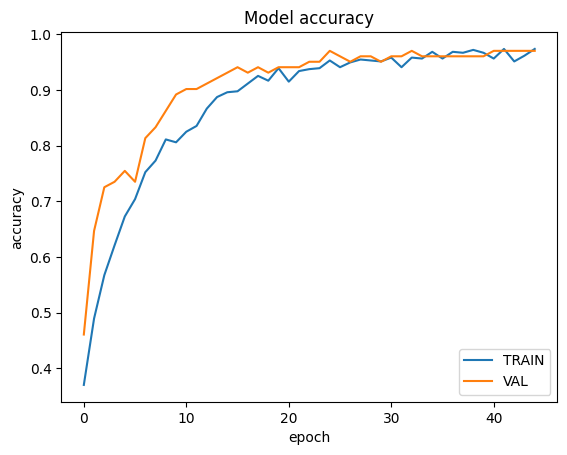

In [22]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [23]:
# Evaluate the model using the TEST dataset
loss, accuracy = model.evaluate(X_test, y_test)


 1/14 [=>............................] - ETA: 0s - loss: 0.0344 - accuracy: 1.0000


14/14 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9906



 1/14 [=>............................] - ETA: 2s


14/14 [==============================] - 0s 2ms/step


Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

       chair       0.98      1.00      0.99        84
       cobra       0.99      1.00      0.99        93
         dog       0.99      1.00      0.99        84
        tree       1.00      1.00      1.00        96
     warrior       1.00      0.94      0.97        68

    accuracy                           0.99       425
   macro avg       0.99      0.99      0.99       425
weighted avg       0.99      0.99      0.99       425



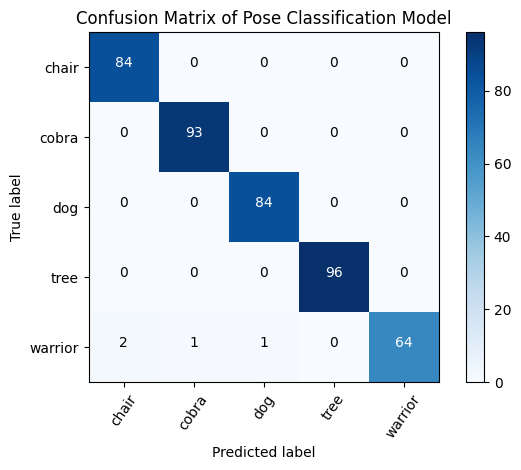

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """Plots the confusion matrix."""
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=55)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()


y_pred = model.predict(X_test)

# Convert the prediction result to class name
y_pred_label = [class_names[i] for i in np.argmax(y_pred, axis=1)]
y_true_label = [class_names[i] for i in np.argmax(y_test, axis=1)]


cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plot_confusion_matrix(cm,
                      class_names,
                      title ='Confusion Matrix of Pose Classification Model')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_true_label,
                                                          y_pred_label))